### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [25]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'The E-commerce Dataset.csv'
df = pd.read_csv(file_path)
#print(df)

#print("Print all the Null Values")
#print(df.isnull())

#rows_with_null = df[df.isnull().any(axis=1)]
#print(rows_with_null)

# Display the DataFrame and count Null values in each column
print("Before removing missing data:")

print(df.isnull().sum())

#drop rows using dropna function
filtered_df = df.dropna(subset=['gender', 'rating', 'helpfulness'], inplace=False)
#review is none
filtered_df = filtered_df[filtered_df['review'] != 'none']

print("\nAfter removing missing data:")
print(filtered_df.isnull().sum())

# Print data before and after
print("\nLength of data before removing:", len(df))
print("Length of data after removing:", len(filtered_df))



Before removing missing data:
userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

After removing missing data:
userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

Length of data before removing: 20000
Length of data after removing: 19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [42]:
#Q2.1
print ("Q2.1")

#nunique() gets the number of unique items and unique() get the list or array of those items
unique_users = filtered_df['userId'].nunique()
print(unique_users)

unique_reviews = filtered_df['review'].nunique()
print(unique_reviews)

unique_items = filtered_df['item'].nunique()
print(unique_items)

unique_categories = filtered_df['category'].unique()
print(unique_categories)

unique_categories = filtered_df['category'].nunique()
print(unique_categories)

#Q2.2
#descriptive stats for the rating records
print ("Q2.2")

rating_details= filtered_df['category'].describe()
print ("Rating details")
print (rating_details)

#Q2.3
#descriptive stats for the genders
print ("Q2.3")
grouped_by_gender = filtered_df.groupby('gender')
print(grouped_by_gender.size())

gender_item_counts = grouped_by_gender['item'].count()

gender_item_stats = gender_item_counts.describe()
print("Gender Items Stats")
print(gender_item_stats)

Q2.1
8562
19459
89
['Online Stores & Services' 'Movies' 'Restaurants & Gourmet'
 'Personal Finance' 'Kids & Family' 'Hotels & Travel' 'Media' 'Games'
 'Books']
9
Q2.2
Rating details
count      19916
unique         9
top       Movies
freq        7048
Name: category, dtype: object
Q2.3
gender
F     9793
M    10123
dtype: int64
count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item, dtype: float64


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

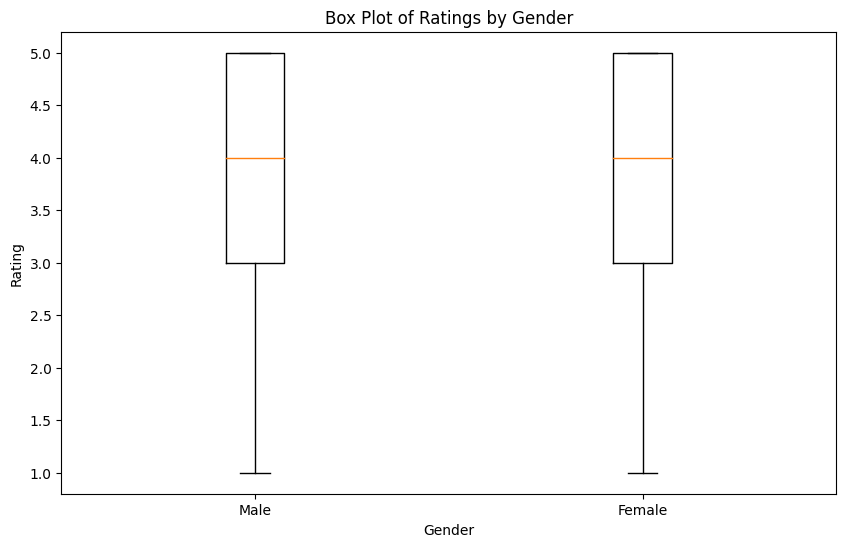

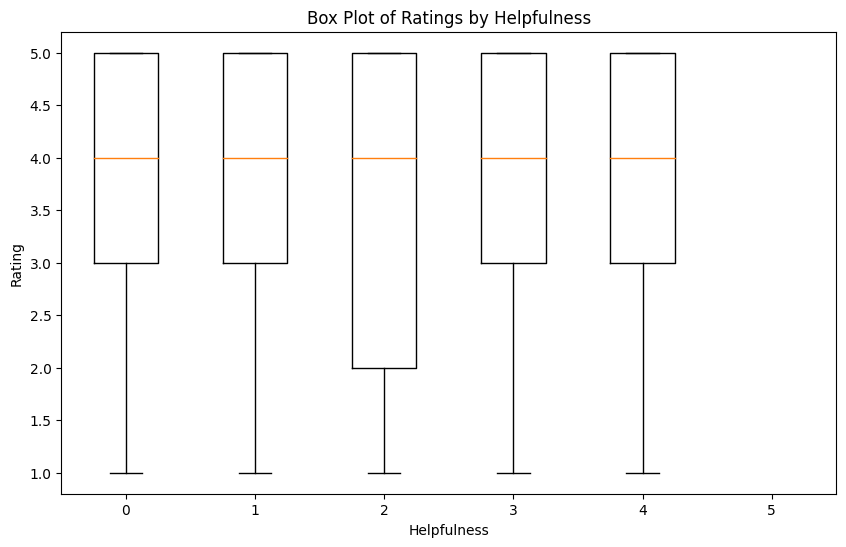

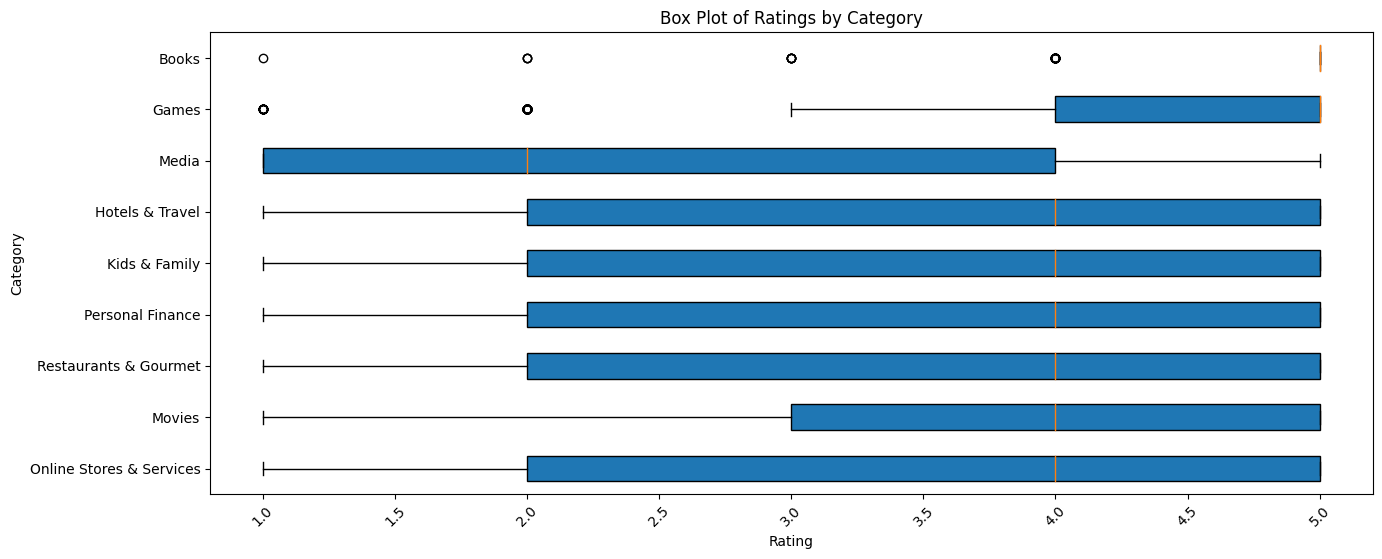

In [47]:
import matplotlib.pyplot as plt

# Create a box plot to compare ratings by gender
plt.figure(figsize=(10, 6))
plt.boxplot([filtered_df[filtered_df['gender'] == 'M']['rating'],
             filtered_df[filtered_df['gender'] == 'F']['rating']],
            labels=['Male', 'Female'])
plt.title("Box Plot of Ratings by Gender")
plt.xlabel("Gender")
plt.ylabel("Rating")
plt.show()

# Create a box plot to compare ratings by helpfulness
helpfulness_values = [0, 1, 2, 3, 4, 5]
helpfulness_data = [filtered_df[filtered_df['helpfulness'] == value]['rating'] for value in helpfulness_values]

plt.figure(figsize=(10, 6))
plt.boxplot(helpfulness_data, labels=helpfulness_values)
plt.title("Box Plot of Ratings by Helpfulness")
plt.xlabel("Helpfulness")
plt.ylabel("Rating")
plt.show()

# Create a box plot to compare ratings by category
plt.figure(figsize=(15, 6))
plt.boxplot([filtered_df[filtered_df['category'] == category]['rating'] for category in filtered_df['category'].unique()],
            labels=filtered_df['category'].unique(), vert=False, patch_artist=True)
plt.title("Box Plot of Ratings by Category")
plt.xlabel("Rating")
plt.ylabel("Category")
plt.xticks(rotation=45)
plt.show()


#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [1]:
# your code and solutions